In [1]:
# you will be prompted with a window asking to grant permissions
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Generating Test Data

In [97]:
import os
import shutil
from random import sample

base_dir = '/content/drive/My Drive/CS444/Project/imgs/train/train'
test_dir = '/content/drive/My Drive/CS444/Project/testdata'
os.makedirs(test_dir, exist_ok=True)


In [3]:
for class_folder in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_folder)
    test_class_dir = os.path.join(test_dir, class_folder)
    os.makedirs(test_class_dir, exist_ok=True)

    # Get all images in the class directory
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(('png', 'jpg', 'jpeg'))]

    # Select 10 random images
    selected_images = sample(images, 10)

    # Copy selected images to the test directory
    for image in selected_images:
        src_path = os.path.join(class_dir, image)
        dst_path = os.path.join(test_class_dir, image)
        shutil.copy(src_path, dst_path)

In [27]:
import cv2
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing import image
import os
import secrets
import datetime
import time

In [26]:
def enhance_brightness(img, value_increment):
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_img)
    v = cv2.add(v, value_increment)
    final_hsv = cv2.merge((h, s, v))
    return cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

def change_contrast(img, level):
   img = Image.fromarray(img.astype('uint8'), 'RGB')
   factor = (259 * (level + 255)) / (255 * (259 - level))
   def contrast(c):
        return 128 + factor * (c - 128)
   return np.array(img.point(contrast))

def preprocess_img(img):
   img = np.array(img)
   x = secrets.randbelow(2)
   if x == 0:
        img = enhance_brightness(img, secrets.randbelow(26))
        img = change_contrast(img, secrets.randbelow(51))
   else:
        img = change_contrast(img, secrets.randbelow(51))
        img = enhance_brightness(img, secrets.randbelow(26))
   return img


In [28]:
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = preprocess_img(img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


## VGG16 Testing

### VGG 16 Deep Model

In [29]:
from tensorflow.keras.models import load_model

# Load your model
model = load_model('/content/drive/My Drive/CS444/Project/testing/model_vgg16_deep.keras')


In [15]:
class_labels = {class_name: idx for idx, class_name in enumerate(sorted(os.listdir(test_dir)))}

total_images = 0
correct_predictions = 0
start_time = time.time()
for class_folder in os.listdir(test_dir):
    class_index = class_labels[class_folder]
    class_dir = os.path.join(test_dir, class_folder)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        processed_img = load_and_preprocess_image(img_path)
        prediction = model.predict(processed_img)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        if predicted_class_index == class_index:
            correct_predictions += 1
        total_images += 1


1/1 [==============================] - 0s 17ms/step


In [16]:
# Calculate accuracy
accuracy_vgg16_deep = correct_predictions / total_images

# End timing
end_time = time.time()
elapsed_time_vgg16_deep = end_time - start_time

print(f"Test Accuracy: {accuracy_vgg16_deep:.2f}")
print(f"Elapsed time for processing and prediction: {elapsed_time_vgg16_deep:.2f} seconds")

Test Accuracy: 0.95
Elapsed time for processing and prediction: 10.95 seconds


### VGG16 Shallow

In [34]:
from tensorflow.keras.models import load_model

# Load your modelmodel_vgg16_deep-02-0.93
model = load_model('/content/drive/My Drive/CS444/Project/testing/model_vgg16_shallow.keras')

In [35]:
total_images = 0
correct_predictions = 0
start_time = time.time()
for class_folder in os.listdir(test_dir):
    class_index = class_labels[class_folder]
    class_dir = os.path.join(test_dir, class_folder)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        processed_img = load_and_preprocess_image(img_path)
        prediction = model.predict(processed_img)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        if predicted_class_index == class_index:
            correct_predictions += 1
        total_images += 1

1/1 [==============================] - 0s 19ms/step


In [36]:
# Calculate accuracy
accuracy_vgg16_shallow = correct_predictions / total_images

# End timing
end_time = time.time()
elapsed_time_vgg16_shallow = end_time - start_time

print(f"Test Accuracy: {accuracy_vgg16_shallow:.2f}")
print(f"Elapsed time for processing and prediction: {elapsed_time_vgg16_shallow:.2f} seconds")

Test Accuracy: 0.93
Elapsed time for processing and prediction: 9.14 seconds


### VGG16 FineTuned

#### Batched

In [47]:
model = load_model('/content/drive/My Drive/CS444/Project/testing/model_vgg16_finetuned_batched.keras')

In [52]:
total_images = 0
correct_predictions = 0
start_time = time.time()
for class_folder in os.listdir(test_dir):
    class_index = class_labels[class_folder]
    class_dir = os.path.join(test_dir, class_folder)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        processed_img = load_and_preprocess_image(img_path)
        prediction = model.predict(processed_img)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        if predicted_class_index == class_index:
            correct_predictions += 1
        total_images += 1

1/1 [==============================] - 0s 19ms/step


In [55]:
# Calculate accuracy
accuracy_vgg16_ft_b = correct_predictions / total_images

# End timing
end_time = time.time()
elapsed_time_vgg16_ft_b = end_time - start_time

print(f"Test Accuracy: {accuracy_vgg16_ft_b:.2f}")
print(f"Elapsed time for processing and prediction: {elapsed_time_vgg16_ft_b:.2f} seconds")

Test Accuracy: 0.96
Elapsed time for processing and prediction: 9.07 seconds


#### Non-Batched

In [59]:
model = load_model('/content/drive/My Drive/CS444/Project/testing/model_vgg16_fintuned_non_batched.keras')

In [63]:
total_images = 0
correct_predictions = 0
start_time = time.time()
for class_folder in os.listdir(test_dir):
    class_index = class_labels[class_folder]
    class_dir = os.path.join(test_dir, class_folder)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        processed_img = load_and_preprocess_image(img_path)
        prediction = model.predict(processed_img)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        if predicted_class_index == class_index:
            correct_predictions += 1
        total_images += 1

1/1 [==============================] - 0s 19ms/step


In [66]:
# Calculate accuracy
accuracy_vgg16_ft_nb = correct_predictions / total_images

# End timing
end_time = time.time()
elapsed_time_vgg16_ft_nb = end_time - start_time

print(f"Test Accuracy: {accuracy_vgg16_ft_b:.2f}")
print(f"Elapsed time for processing and prediction: {elapsed_time_vgg16_ft_nb:.2f} seconds")

Test Accuracy: 0.96
Elapsed time for processing and prediction: 10.05 seconds


### VGG16 Visualization

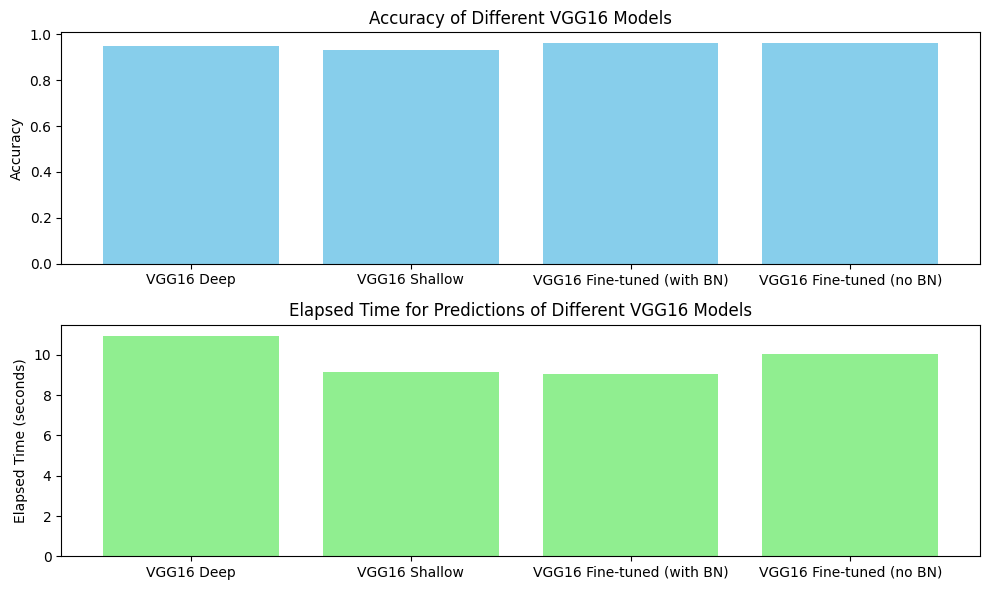

In [89]:
import matplotlib.pyplot as plt


models = ['VGG16 Deep', 'VGG16 Shallow', 'VGG16 Fine-tuned (with BN)', 'VGG16 Fine-tuned (no BN)']

accuracies = [0.95, 0.93, 0.96, 0.96]

elapsed_times = [10.95, 9.14, 9.07, 10.05]


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy of Different VGG16 Models')
plt.ylabel('Accuracy')

plt.subplot(2, 1, 2)
plt.bar(models, elapsed_times, color='lightgreen')
plt.title('Elapsed Time for Predictions of Different VGG16 Models')
plt.ylabel('Elapsed Time (seconds)')

plt.tight_layout()
plt.show()

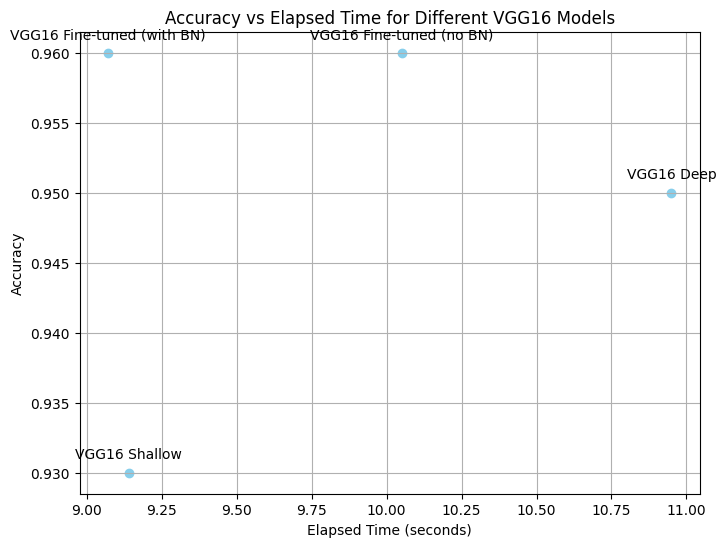

In [90]:
import matplotlib.pyplot as plt


models = ['VGG16 Deep', 'VGG16 Shallow', 'VGG16 Fine-tuned (with BN)', 'VGG16 Fine-tuned (no BN)']

accuracies = [0.95, 0.93, 0.96, 0.96]

elapsed_times = [10.95, 9.14, 9.07, 10.05]

plt.figure(figsize=(8, 6))

plt.scatter(elapsed_times, accuracies, color='skyblue')
plt.title('Accuracy vs Elapsed Time for Different VGG16 Models')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Accuracy')
plt.grid(True)

for i, model in enumerate(models):
    plt.annotate(model, (elapsed_times[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


## VGG19 Testing

### VGG 19 Deep Model

In [70]:
model = load_model('/content/drive/My Drive/CS444/Project/testing/model_vgg19_deep.keras')

In [73]:
class_labels = {class_name: idx for idx, class_name in enumerate(sorted(os.listdir(test_dir)))}

total_images = 0
correct_predictions = 0
start_time = time.time()
for class_folder in os.listdir(test_dir):
    class_index = class_labels[class_folder]
    class_dir = os.path.join(test_dir, class_folder)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        processed_img = load_and_preprocess_image(img_path)
        prediction = model.predict(processed_img)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        if predicted_class_index == class_index:
            correct_predictions += 1
        total_images += 1


1/1 [==============================] - 0s 27ms/step


In [74]:
# Calculate accuracy
accuracy_vgg19_deep = correct_predictions / total_images

# End timing
end_time = time.time()
elapsed_time_vgg19_deep = end_time - start_time

print(f"Test Accuracy: {accuracy_vgg19_deep:.2f}")
print(f"Elapsed time for processing and prediction: {elapsed_time_vgg19_deep:.2f} seconds")

Test Accuracy: 0.94
Elapsed time for processing and prediction: 10.68 seconds


### VGG 19 Shallow Model

In [75]:
model = load_model('/content/drive/My Drive/CS444/Project/testing/model_vgg19_shallow.keras')

In [76]:
class_labels = {class_name: idx for idx, class_name in enumerate(sorted(os.listdir(test_dir)))}

total_images = 0
correct_predictions = 0
start_time = time.time()
for class_folder in os.listdir(test_dir):
    class_index = class_labels[class_folder]
    class_dir = os.path.join(test_dir, class_folder)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        processed_img = load_and_preprocess_image(img_path)
        prediction = model.predict(processed_img)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        if predicted_class_index == class_index:
            correct_predictions += 1
        total_images += 1


1/1 [==============================] - 0s 20ms/step


In [79]:
# Calculate accuracy
accuracy_vgg19_shallow= correct_predictions / total_images

# End timing
end_time = time.time()
elapsed_time_vgg19_shallow = end_time - start_time

print(f"Test Accuracy: {accuracy_vgg19_shallow:.2f}")
print(f"Elapsed time for processing and prediction: {elapsed_time_vgg19_shallow:.2f} seconds")

Test Accuracy: 0.94
Elapsed time for processing and prediction: 9.68 seconds


### VGG 19 Finetuned

#### Batched

In [ ]:
model = load_model('/content/drive/My Drive/CS444/Project/testing/model_vgg19_finetuned_batched.keras')

In [86]:
total_images = 0
correct_predictions = 0
start_time = time.time()
for class_folder in os.listdir(test_dir):
    class_index = class_labels[class_folder]
    class_dir = os.path.join(test_dir, class_folder)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        processed_img = load_and_preprocess_image(img_path)
        prediction = model.predict(processed_img)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        if predicted_class_index == class_index:
            correct_predictions += 1
        total_images += 1

1/1 [==============================] - 0s 18ms/step


In [88]:
# Calculate accuracy
accuracy_vgg19_ft_b = correct_predictions / total_images

# End timing
end_time = time.time()
elapsed_time_vgg19_ft_b = end_time - start_time

print(f"Test Accuracy: {accuracy_vgg19_ft_b:.2f}")
print(f"Elapsed time for processing and prediction: {elapsed_time_vgg19_ft_b:.2f} seconds")

Test Accuracy: 0.98
Elapsed time for processing and prediction: 8.89 seconds


#### Not Batched

In [80]:
model = load_model('/content/drive/My Drive/CS444/Project/testing/model_vgg19_finetuned_non_batched.keras')

In [81]:
total_images = 0
correct_predictions = 0
start_time = time.time()
for class_folder in os.listdir(test_dir):
    class_index = class_labels[class_folder]
    class_dir = os.path.join(test_dir, class_folder)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        processed_img = load_and_preprocess_image(img_path)
        prediction = model.predict(processed_img)
        predicted_class_index = np.argmax(prediction, axis=1)[0]
        if predicted_class_index == class_index:
            correct_predictions += 1
        total_images += 1

1/1 [==============================] - 0s 20ms/step


In [84]:
# Calculate accuracy
accuracy_vgg19_ft_nb = correct_predictions / total_images

# End timing
end_time = time.time()
elapsed_time_vgg19_ft_nb = end_time-start_time

print(f"Test Accuracy: {accuracy_vgg19_ft_nb:.2f}")
print(f"Elapsed time for processing and prediction: {elapsed_time_vgg19_ft_nb:.2f} seconds")

Test Accuracy: 0.97
Elapsed time for processing and prediction: 9.46 seconds


## CNN Simple

In [110]:
import torch
import torch.nn as nn
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchvision import models
from PIL import Image
import numpy as np
import cv2
import secrets
import os
import time

# Preprocessing functions
def enhance_brightness(img, value_increment):
    hsv_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_img)
    v = cv2.add(v, value_increment)
    final_hsv = cv2.merge((h, s, v))
    return Image.fromarray(cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB))

def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    return img.point(lambda c: 128 + factor * (c - 128))

class RandomContrastBrightnessTransform:
    def __call__(self, img):
        if secrets.randbelow(2) == 0:
            img = enhance_brightness(img, secrets.randbelow(26))
            img = change_contrast(img, secrets.randbelow(51))
        else:
            img = change_contrast(img, secrets.randbelow(51))
            img = enhance_brightness(img, secrets.randbelow(26))
        return img

# Image transformations
transform = transforms.Compose([
    transforms.RandomRotation(5),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, translate=(0.02, 0.02), shear=0.01, scale=(0.95, 1.05)),
    RandomContrastBrightnessTransform(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


In [95]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [109]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10, input_size=224):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.act1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.act2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.act3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        final_size = input_size // (2**3)
        self.fc_input_features = 128 * final_size * final_size

        self.fc1 = nn.Linear(self.fc_input_features, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool1(self.act1(self.conv1(x)))
        x = self.pool2(self.act2(self.conv2(x)))
        x = self.pool3(self.act3(self.conv3(x)))
        x = x.view(-1, self.fc_input_features)

        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN(num_classes=10, input_size=224)
model.to(device)
print(model)

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)


In [111]:
# Load the model
model = SimpleCNN(num_classes=10, input_size=224)
model.load_state_dict(torch.load('/content/drive/My Drive/CS444/Project/testing/simplecnn.pt'))
model.eval()
model.to(device)

SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (act3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=100352, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [112]:
class_labels = {class_name: idx for idx, class_name in enumerate(sorted(os.listdir(test_dir)))}
total_images = 0
correct_predictions = 0
start_time = time.time()

for class_folder in os.listdir(test_dir):
    class_index = class_labels[class_folder]
    class_dir = os.path.join(test_dir, class_folder)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        img = Image.open(img_path).convert('RGB')
        img_tensor = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(img_tensor)
            _, predicted_class_index = torch.max(outputs, 1)

        if predicted_class_index.item() == class_index:
            correct_predictions += 1
        total_images += 1


In [114]:
accuracy_cnn = correct_predictions / total_images
end_time = time.time()
elapsed_time_cnn = end_time - start_time

print(f"Test Accuracy: {accuracy_cnn:.2f}")
print(f"Elapsed time for processing and prediction: {elapsed_time_cnn:.2f} seconds")

Test Accuracy: 0.89
Elapsed time for processing and prediction: 10.56 seconds


## Hybrid Architecture

In [104]:
# Model definition
class HybridCNNTransformer(nn.Module):
    def __init__(self, num_classes=10, feature_dim=512, num_heads=8, num_layers=3):
        super(HybridCNNTransformer, self).__init__()
        self.cnn = models.resnet50(pretrained=True)
        self.cnn = nn.Sequential(*list(self.cnn.children())[:-1])
        self.dim_reduction = nn.Linear(2048, feature_dim)

        self.encoder_layer = TransformerEncoderLayer(d_model=feature_dim, nhead=num_heads)
        self.transformer_encoder = TransformerEncoder(self.encoder_layer, num_layers=num_layers)

        self.fc = nn.Linear(feature_dim, num_classes)

    def forward(self, x):
        cnn_features = self.cnn(x)
        cnn_features = cnn_features.view(cnn_features.size(0), -1)

        reduced_features = self.dim_reduction(cnn_features)

        transformer_input = reduced_features.unsqueeze(1)

        transformer_output = self.transformer_encoder(transformer_input)
        transformer_output = transformer_output.mean(dim=1)

        logits = self.fc(transformer_output)
        return logits


In [103]:
# Load the model
model = HybridCNNTransformer()
model.load_state_dict(torch.load('/content/drive/My Drive/CS444/Project/testing/hybrid.pth'))
model.eval()
model.to(device)

HybridCNNTransformer(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Co

In [105]:
class_labels = {class_name: idx for idx, class_name in enumerate(sorted(os.listdir(test_dir)))}
total_images = 0
correct_predictions = 0
start_time = time.time()

for class_folder in os.listdir(test_dir):
    class_index = class_labels[class_folder]
    class_dir = os.path.join(test_dir, class_folder)
    for img_file in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_file)
        img = Image.open(img_path).convert('RGB')
        img_tensor = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = model(img_tensor)
            _, predicted_class_index = torch.max(outputs, 1)

        if predicted_class_index.item() == class_index:
            correct_predictions += 1
        total_images += 1


In [108]:
accuracy_hybrid = correct_predictions / total_images
end_time = time.time()
elapsed_time_hybrid = end_time - start_time

print(f"Test Accuracy: {accuracy_hybrid:.2f}")
print(f"Elapsed time for processing and prediction: {elapsed_time_hybrid:.2f} seconds")

Test Accuracy: 0.98
Elapsed time for processing and prediction: 11.05 seconds


# Final Visualization

<ipython-input-115-d24163c9ad17>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=df, palette='viridis')
<ipython-input-115-d24163c9ad17>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Elapsed Time (s)', y='Model', data=df, palette='inferno')


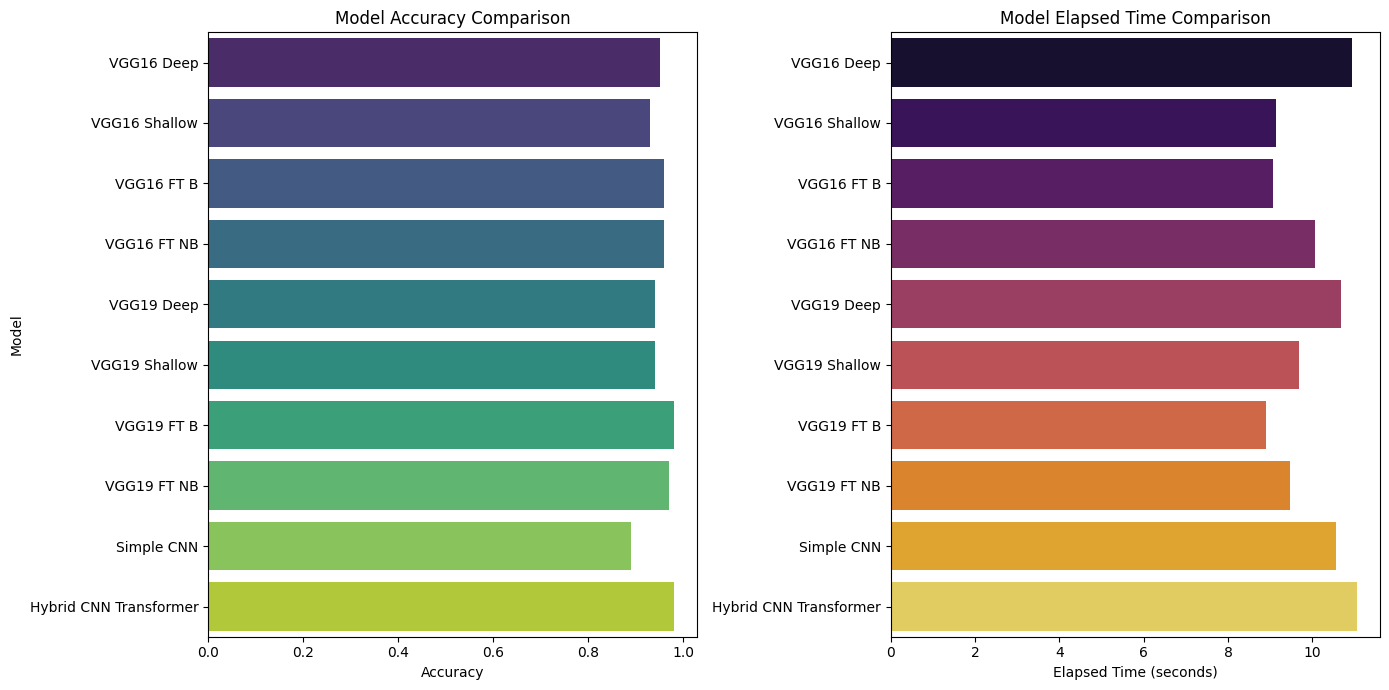

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data preparation
data = {
    "Model": ["VGG16 Deep", "VGG16 Shallow", "VGG16 FT B", "VGG16 FT NB",
              "VGG19 Deep", "VGG19 Shallow", "VGG19 FT B", "VGG19 FT NB",
              "Simple CNN", "Hybrid CNN Transformer"],
    "Accuracy": [0.95, 0.93, 0.96, 0.96, 0.94, 0.94, 0.98, 0.97, 0.89, 0.98],
    "Elapsed Time (s)": [10.95, 9.14, 9.07, 10.05, 10.68, 9.68, 8.89, 9.46, 10.56, 11.05]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(14, 7))

# Accuracy plot
plt.subplot(1, 2, 1)
sns.barplot(x='Accuracy', y='Model', data=df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')

# Elapsed Time plot
plt.subplot(1, 2, 2)
sns.barplot(x='Elapsed Time (s)', y='Model', data=df, palette='inferno')
plt.title('Model Elapsed Time Comparison')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('')

plt.tight_layout()
plt.show()


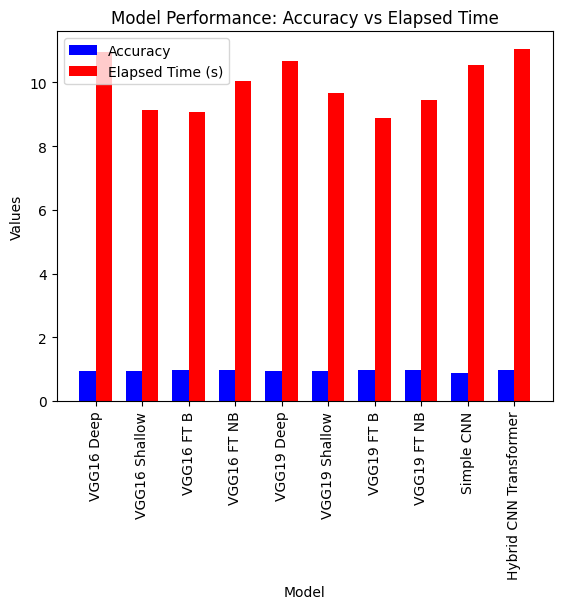

In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data preparation
data = {
    "Model": ["VGG16 Deep", "VGG16 Shallow", "VGG16 FT B", "VGG16 FT NB",
              "VGG19 Deep", "VGG19 Shallow", "VGG19 FT B", "VGG19 FT NB",
              "Simple CNN", "Hybrid CNN Transformer"],
    "Accuracy": [0.95, 0.93, 0.96, 0.96, 0.94, 0.94, 0.98, 0.97, 0.89, 0.98],
    "Elapsed Time (s)": [10.95, 9.14, 9.07, 10.05, 10.68, 9.68, 8.89, 9.46, 10.56, 11.05]
}

df = pd.DataFrame(data)

# Number of groups and bar width
n_groups = len(df)
index = np.arange(n_groups)
bar_width = 0.35

# Create bars
fig, ax = plt.subplots()
accuracy_bars = ax.bar(index, df['Accuracy'], bar_width, label='Accuracy', color='b')
time_bars = ax.bar(index + bar_width, df['Elapsed Time (s)'], bar_width, label='Elapsed Time (s)', color='r')

# Add titles and labels
ax.set_xlabel('Model')
ax.set_ylabel('Values')
ax.set_title('Model Performance: Accuracy vs Elapsed Time')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['Model'], rotation=90)
ax.legend()

# Show the plot
plt.show()


<ipython-input-117-a29386445bee>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Model'], rotation=90)


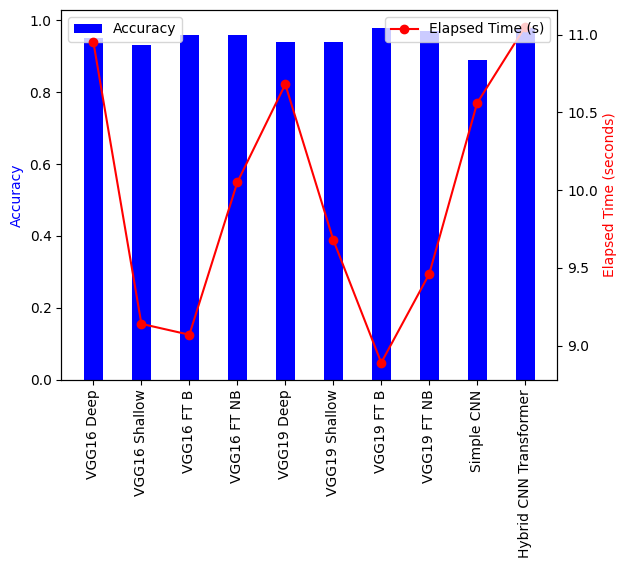

In [117]:
import matplotlib.pyplot as plt

# Create figure and axis objects with subplots()
fig, ax = plt.subplots()

# Make a plot with accuracy on the left y-axis
ax.bar(df['Model'], df['Accuracy'], color='blue', width=0.4, label='Accuracy')
ax.set_ylabel('Accuracy', color='blue')
ax.set_xticklabels(df['Model'], rotation=90)
ax.legend(loc='upper left')

# Create another y-axis for the elapsed time
ax2 = ax.twinx()
ax2.plot(df['Model'], df['Elapsed Time (s)'], color='red', marker='o', label='Elapsed Time (s)')
ax2.set_ylabel('Elapsed Time (seconds)', color='red')
ax2.legend(loc='upper right')

# Show plot
plt.show()


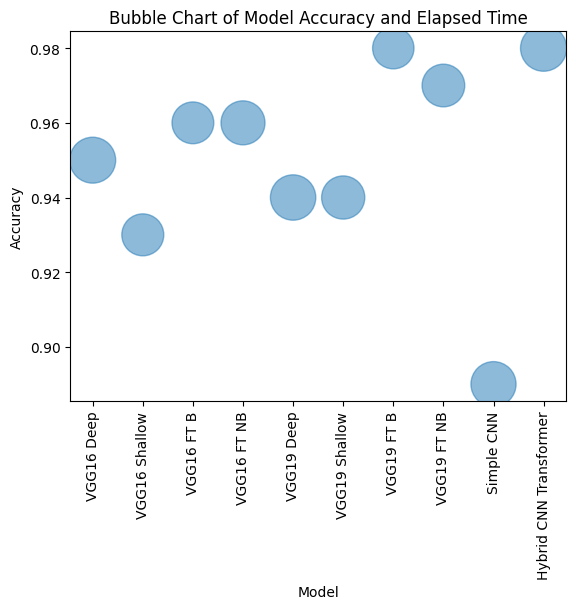

In [118]:
import matplotlib.pyplot as plt

# Scale the elapsed time for better visibility
size = df['Elapsed Time (s)'] * 100

plt.scatter(df['Model'], df['Accuracy'], s=size, alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Bubble Chart of Model Accuracy and Elapsed Time')
plt.show()
